<a href="https://colab.research.google.com/github/jcjcchang/2nd-ML100Days/blob/master/homework/Day71_%E4%BD%BF%E7%94%A8%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [0]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [27]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

from keras import losses
model.compile(loss= 'mean_squared_error', optimizer='sgd')
#model.losses.mean_squared_error(y_true, y_pred)

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [28]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         





Train on 37500 samples, validate on 12500 samples
Epoch 1/12





37500/37500 [==============================] - 107s 3ms/step - loss: 0.0904 - val_loss: 0.0898
Epoch 2/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0901 - val_loss: 0.0897
Epoch 3/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0899 - val_loss: 0.0897
Epoch 4/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0898 - val_loss: 0.0896
Epoch 5/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0897 - val_loss: 0.0895
Epoch 6/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0896 - val_loss: 0.0895
Epoch 7/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0895 - val_loss: 0.0894
Epoch 8/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0894 - val_loss: 0.0893
Epoch 9/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.0893 - val_l

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

In [34]:
train_history.history

{'loss': [0.09043299619992574,
  0.09011984524170558,
  0.08992892332633336,
  0.08980581267674764,
  0.08969530254681905,
  0.08958879446427027,
  0.08948902764717738,
  0.08935943871100743,
  0.08926917239268621,
  0.08913167180697124,
  0.08898350940863291,
  0.08884779280026754],
 'val_loss': [0.08983057053565979,
  0.0897382430434227,
  0.08966494330644607,
  0.08959741050243378,
  0.08952965338230133,
  0.08945957952737808,
  0.08938991087198257,
  0.08931462502479554,
  0.08923634010076523,
  0.08915144999027252,
  0.08905939676523209,
  0.08896210084676742]}

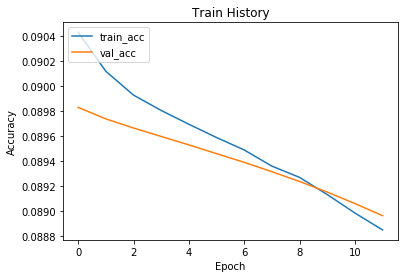

In [35]:
show_train_history('loss','val_loss')

In [38]:

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

SyntaxError: ignored

In [41]:
model.evaluate(x_img_train_normalize, y_label_train_OneHot)

50000/50000 [==============================] - 34s 680us/step


0.0889670586681366

In [42]:
model.evaluate(x_img_test_normalize, y_label_test_OneHot)

10000/10000 [==============================] - 7s 670us/step


0.08897423207759857

In [43]:
model.compile(loss= 'binary_crossentropy', optimizer='sgd')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [44]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 106s 3ms/step - loss: 0.3172 - val_loss: 0.3167
Epoch 2/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.3129 - val_loss: 0.3128
Epoch 3/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.3074 - val_loss: 0.3081
Epoch 4/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.3017 - val_loss: 0.3036
Epoch 5/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.2970 - val_loss: 0.2994
Epoch 6/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.2935 - val_loss: 0.2966
Epoch 7/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.2909 - val_loss: 0.2939
Epoch 8/12
37500/37500 [==============================] - 104s 3ms/step - loss: 0.2886 - val_loss: 0.2923
Epoch 9/12
37500/37500 [==============================] - 105s 3ms/step - loss: 0.2866 - val_loss: 0.2

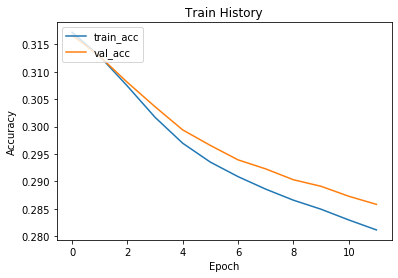

In [45]:
show_train_history('loss','val_loss')

In [46]:
model.evaluate(x_img_test_normalize, y_label_test_OneHot)

10000/10000 [==============================] - 7s 685us/step


0.2846409864425659